In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


#data=pd.read_csv("C:\\Users\\Utsav\\Desktop\\Mxene\\ML_exp", sep=',',header=0)

url = "https://raw.githubusercontent.com/UtsavMurarka/MXene-machine-learning/master/anant_data_miner/post_midsem_work/data_physical.csv"

data=pd.read_csv(url, sep=',',header=0)
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,bandgap,nn1,nn2,nn3,nn4,nn5,np1,np2,np3,np4,np5,...,en2,en3,en4,en5,ie1,ie2,ie3,ie4,ie5,d1,d2,d3,d4,d5,mp1,mp2,mp3,mp4,mp5,bp1,bp2,bp3,bp4,bp5,numiso1,numiso2,numiso3,numiso4,numiso5,shell1,shell2,shell3,shell4,shell5,spheat1,spheat2,spheat3,spheat4,spheat5,label
0,3.26,0.0,0.0,-1.63,2.82,0.0,0.000000e+00,1.000000e-16,32.8,0.333,0.667,0.383,0.667,0.333,0.220,0.000,0.000,0.301,0.333,0.667,0.275,0.667,0.333,0.328,24.0,24.0,6.0,35.0,35.0,0.0,28,28,6,45,45,24,24,6,35,35,...,1.66,2.55,2.96,2.96,6.7665,6.7665,11.2603,11.8138,11.8138,7.15,7.15,2.27,3.12000,3.12000,2130.15,2130.15,3948.15,266.05,266.050,2944,2944,4300.0,332.00,332.00,9,9,7,19,19,4,4,2,4,4,0.449,0.449,0.709,0.474,0.474,0
1,3.13,0.0,0.0,-1.56,2.71,0.0,0.000000e+00,-2.000000e-16,35.6,0.333,0.667,0.374,0.000,0.000,0.296,0.333,0.667,0.270,0.667,0.333,0.322,0.667,0.333,0.244,24.0,24.0,6.0,35.0,1.0,0.0,28,28,6,45,0,24,24,6,35,1,...,1.66,2.55,2.96,2.20,6.7665,6.7665,11.2603,11.8138,13.5984,7.15,7.15,2.27,3.12000,0.00009,2130.15,2130.15,3948.15,266.05,14.175,2944,2944,4300.0,332.00,20.28,9,9,7,19,3,4,4,2,4,1,0.449,0.449,0.709,0.474,14.304,0
2,3.24,0.0,0.0,-1.62,2.81,0.0,1.000000e-16,-2.000000e-16,33.1,0.667,0.333,0.220,0.000,0.000,0.302,0.333,0.667,0.379,0.333,0.667,0.274,0.667,0.333,0.330,24.0,24.0,6.0,17.0,35.0,0.0,28,28,6,18,45,24,24,6,17,35,...,1.66,2.55,3.16,2.96,6.7665,6.7665,11.2603,12.9676,11.8138,7.15,7.15,2.27,0.00321,3.12000,2130.15,2130.15,3948.15,172.31,266.050,2944,2944,4300.0,239.11,332.00,9,9,7,11,19,4,4,2,3,4,0.449,0.449,0.709,0.479,0.474,0
3,3.18,0.0,0.0,-1.59,2.75,0.0,0.000000e+00,-1.000000e-16,34.6,0.000,0.000,0.301,0.333,0.667,0.376,0.667,0.333,0.226,0.333,0.667,0.274,0.667,0.333,0.328,24.0,24.0,6.0,17.0,17.0,0.0,28,28,6,18,18,24,24,6,17,17,...,1.66,2.55,3.16,3.16,6.7665,6.7665,11.2603,12.9676,12.9676,7.15,7.15,2.27,0.00321,0.00321,2130.15,2130.15,3948.15,172.31,172.310,2944,2944,4300.0,239.11,239.11,9,9,7,11,11,4,4,2,3,3,0.449,0.449,0.709,0.479,0.479,0
4,3.10,0.0,0.0,-1.55,2.68,0.0,0.000000e+00,2.000000e-16,36.4,0.000,0.000,0.297,0.333,0.667,0.369,0.333,0.667,0.270,0.667,0.333,0.323,0.667,0.333,0.245,24.0,24.0,6.0,17.0,1.0,0.0,28,28,6,18,0,24,24,6,17,1,...,1.66,2.55,3.16,2.20,6.7665,6.7665,11.2603,12.9676,13.5984,7.15,7.15,2.27,0.00321,0.00009,2130.15,2130.15,3948.15,172.31,14.175,2944,2944,4300.0,239.11,20.28,9,9,7,11,3,4,4,2,3,1,0.449,0.449,0.709,0.479,14.304,0


In [0]:
#drop band gap column
data = data.drop('bandgap', axis=1)
print(np.shape(data))

(3079, 100)


In [0]:
mxene=data.values
mxene=np.array(mxene)
#split the data

train, test = train_test_split(data, test_size=0.2)
train=np.array(train)
test=np.array(test)
NegativeCount=0
PositiveCount=0
for i in range(len(train)):
    if train[i][99]==0 :
        NegativeCount=NegativeCount+1
    if train[i][99]==1:
        PositiveCount=PositiveCount+1
print(NegativeCount)
print(PositiveCount)
print(PositiveCount+NegativeCount)
positives=np.zeros((PositiveCount,100))
negatives=np.zeros((NegativeCount,100))
    
j=0
k=0
    
for i in range(len(train)):

    if(train[i,99] == 1):
        positives[j,:] = train[i,:]
        j=j+1
    if(train[i,99] == 0):
        negatives[k,:] = train[i,:]
        k=k+1

print(np.shape(train))
print(np.shape(test))

2152
311
2463
(2463, 100)
(616, 100)


In [0]:
y_train=np.zeros(len(train))
y_test=np.zeros(len(test))

for i in range(len(test)):
    y_test[i]=test[i][99]
    test[i][99]=1

for i in range(len(train)):
    y_train[i]=train[i][99]
    train[i][99]=1

train = np.delete(train, 99, 1)
test = np.delete(test, 99, 1)

train = np.delete(train, 98, 1)
test = np.delete(test, 98, 1)

print(np.shape(train))
print(np.shape(test))
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

(2463, 98)
(616, 98)


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(98, input_dim=98, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(train_scaled, y_train, epochs=10, batch_size=10)

Epoch 1/10
2463/2463 [==============================] - 0s 139us/step - loss: 0.0852 - acc: 0.9728
Epoch 2/10
2463/2463 [==============================] - 0s 136us/step - loss: 0.0845 - acc: 0.9716
Epoch 3/10
2463/2463 [==============================] - 0s 136us/step - loss: 0.0845 - acc: 0.9691
Epoch 4/10
2463/2463 [==============================] - 0s 133us/step - loss: 0.0856 - acc: 0.9691
Epoch 5/10
2463/2463 [==============================] - 0s 138us/step - loss: 0.0802 - acc: 0.9728
Epoch 6/10
2463/2463 [==============================] - 0s 144us/step - loss: 0.0798 - acc: 0.9720
Epoch 7/10
2463/2463 [==============================] - 0s 134us/step - loss: 0.0762 - acc: 0.9756
Epoch 8/10
2463/2463 [==============================] - 0s 137us/step - loss: 0.0776 - acc: 0.9720
Epoch 9/10
2463/2463 [==============================] - 0s 141us/step - loss: 0.0748 - acc: 0.9740
Epoch 10/10
2463/2463 [==============================] - 0s 133us/step - loss: 0.0761 - acc: 0.9732


In [0]:
_, accuracy = model.evaluate(test_scaled, y_test)
print('Accuracy: %.2f' % (accuracy*100))

616/616 [==============================] - 0s 35us/step
Accuracy: 91.88


In [0]:
_, accuracy = model.evaluate(train_scaled, y_train)
print('Accuracy: %.2f' % (accuracy*100))

2463/2463 [==============================] - 0s 22us/step
Accuracy: 98.01


In [0]:
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dropout(0.3, input_shape=(98,)))
model.add(Dense(98, input_dim=98, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(train_scaled, y_train, epochs=150, batch_size=10)

Epoch 1/150
2463/2463 [==============================] - 2s 642us/step - loss: 0.3950 - acc: 0.8628
Epoch 2/150
2463/2463 [==============================] - 0s 175us/step - loss: 0.3501 - acc: 0.8725
Epoch 3/150
2463/2463 [==============================] - 0s 170us/step - loss: 0.3353 - acc: 0.8701
Epoch 4/150
2463/2463 [==============================] - 0s 175us/step - loss: 0.3163 - acc: 0.8745
Epoch 5/150
2463/2463 [==============================] - 0s 185us/step - loss: 0.3196 - acc: 0.8827
Epoch 6/150
2463/2463 [==============================] - 0s 178us/step - loss: 0.3238 - acc: 0.8725
Epoch 7/150
2463/2463 [==============================] - 0s 180us/step - loss: 0.3076 - acc: 0.8733
Epoch 8/150
2463/2463 [==============================] - 0s 177us/step - loss: 0.2961 - acc: 0.8749
Epoch 9/150
2463/2463 [==============================] - 0s 184us/step - loss: 0.2962 - acc: 0.8733
Epoch 10/150
2463/2463 [==============================] - 0s 184us/step - loss: 0.2984 - acc: 0.8782

In [0]:
_, accuracy = model.evaluate(test_scaled, y_test)
print('Accuracy: %.2f' % (accuracy*100))

616/616 [==============================] - 1s 861us/step
Accuracy: 91.23


In [0]:
_, accuracy = model.evaluate(train_scaled, y_train)
print('Accuracy: %.2f' % (accuracy*100))

2463/2463 [==============================] - 0s 30us/step
Accuracy: 97.20


In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
def build_model():
  model = Sequential()
  model.add(Dropout(0.3, input_shape=(98,)))
  model.add(Dense(98, input_dim=98, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(250, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

keras_model = build_model()
keras_model.fit(train_scaled, y_train, epochs=100, batch_size=20, verbose=1)

Epoch 1/100
2463/2463 [==============================] - 2s 758us/step - loss: 0.3923 - acc: 0.8729
Epoch 2/100
2463/2463 [==============================] - 0s 116us/step - loss: 0.3478 - acc: 0.8737
Epoch 3/100
2463/2463 [==============================] - 0s 122us/step - loss: 0.3303 - acc: 0.8713
Epoch 4/100
2463/2463 [==============================] - 0s 119us/step - loss: 0.3170 - acc: 0.8745
Epoch 5/100
2463/2463 [==============================] - 0s 112us/step - loss: 0.3147 - acc: 0.8754
Epoch 6/100
2463/2463 [==============================] - 0s 115us/step - loss: 0.3004 - acc: 0.8806
Epoch 7/100
2463/2463 [==============================] - 0s 117us/step - loss: 0.2976 - acc: 0.8790
Epoch 8/100
2463/2463 [==============================] - 0s 118us/step - loss: 0.2880 - acc: 0.8843
Epoch 9/100
2463/2463 [==============================] - 0s 125us/step - loss: 0.2963 - acc: 0.8843
Epoch 10/100
2463/2463 [==============================] - 0s 117us/step - loss: 0.2914 - acc: 0.8823

In [0]:
_, accuracy = model.evaluate(test_scaled, y_test)
print('Accuracy: %.2f' % (accuracy*100))
_, accuracy = model.evaluate(train_scaled, y_train)
print('Accuracy: %.2f' % (accuracy*100))

616/616 [==============================] - 0s 56us/step
Accuracy: 91.23
2463/2463 [==============================] - 0s 36us/step
Accuracy: 97.20


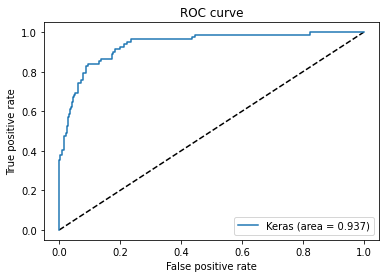

In [0]:
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(test_scaled).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()